In [1]:
using Revise
using Plots
using Reparam

In [2]:
# Define test curves and functions
γopt(t) = 0.9t^2 + 0.1t  # Optimal Diffeomorphism
s1(t) = [cos(2π*t), sin(2π*t)] # Circle
s2 = s1 ∘ γopt


savepath="/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"

"/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"

In [3]:
function shape_distance(s1, s2, projection_builder, Nrange)
    E = []
    T = []
    
    q = Q_transform(s2)
    r = Q_transform(s1)
    
    for n in Nrange
        println()
        println("="^80)
        println("N = $n")
        println("="^80)
        proj = projection_builder(n)
        t = @elapsed res = reparametrize(q, r, proj, maxiter=50, lsconfig=BacktrackConfig(c=0.8), α_step=0.9)
        push!(E, res.errors[end])
        push!(T, t)
    end
    return (E, T)
end        

shape_distance (generic function with 1 method)

In [4]:
Nrange_fourier = 1:15
fourier_error, fourier_time = shape_distance(s1, s2, FourierSineProjector, Nrange_fourier)


N = 1
 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 6.3185650397e+00 |                  |                  |                  |
|    1 | 1.2298389615e+00 | 3.4400131579e-03 | 1.4808128664e-03 | 9.6889163183e-02 | 8.0536103470e-01 |
|    2 | 5.0590624283e-01 | 6.1335806573e-03 | 6.7113019528e-04 | 2.4627925303e-02 | 5.8864025400e-01 |
|    3 | 2.6449055366e-01 | 9.9643500322e-03 | 5.7942433378e-04 | 1.3088289251e-02 | 4.7719452486e-01 |
|    4 | 1.6382417600e-01 | 1.5554469691e-02 | 5.9343478789e-04 | 8.5872265776e-03 | 3.8060481280e-01 |
|    5 | 1.2318423856e-01 | 2.4974293676e-02 | 6.2514540698e-04 | 5.6340793576e-03 | 2.4807045231e-01 |
|    6 | 1.0873932765e-01 | 4.1684644396e-02 | 6.1613584928e-04 | 3.3268675198e-03 | 1.1726265530e-01 |
|    7 

|    8 | 1.0645908005e-01 | 1.4021206305e-02 | 1.0065795791e-03 | 7.2850587794e-03 | 2.8451192699e-01 |
|    9 | 9.3487064483e-02 | 8.5547008539e-03 | 3.6264367790e-04 | 2.3978705328e-03 | 1.2184978078e-01 |
|   10 | 4.8964406939e-02 | 1.8666618163e-02 | 2.0424824899e-03 | 1.0594337936e-02 | 4.7624404286e-01 |
|   11 | 3.9395650757e-02 | 2.5584527642e-02 | 9.7610198460e-04 | 3.3949269183e-03 | 1.9542269130e-01 |
|   12 | 3.5932926700e-02 | 1.8025378726e-02 | 3.6547464050e-04 | 1.2441067327e-03 | 8.7896099959e-02 |
|   13 | 2.0583486412e-02 | 2.3664980952e-02 | 2.5893982935e-03 | 6.9784282927e-03 | 4.2716922049e-01 |
|   14 | 1.8851777780e-02 | 2.5454515811e-02 | 5.7344950242e-04 | 1.1033351985e-03 | 8.4130967731e-02 |
|   15 | 1.6817303798e-02 | 3.4115605453e-02 | 8.5396665595e-04 | 1.4559627947e-03 | 1.0791947617e-01 |
|   16 | 1.5768441313e-02 | 2.8805521690e-02 | 4.7307893797e-04 | 7.8629008335e-04 | 6.2368052383e-02 |
|   17 | 1.3497634983e-02 | 3.8252669143e-02 | 1.4594174569e-03 

|    6 | 1.1756025706e+00 | 7.8857506784e-04 | 2.4746321210e-04 | 7.2382840769e-03 | 1.2643550747e-01 |
|    7 | 1.1396537710e+00 | 1.7814088736e-04 | 3.3009866074e-05 | 1.2130684995e-03 | 3.0579041305e-02 |
|    8 | 1.0578293596e+00 | 5.4654878408e-04 | 1.3892536778e-04 | 3.7520485411e-03 | 7.1797605099e-02 |
|    9 | 1.0242646747e+00 | 3.2827412485e-04 | 4.9272185047e-05 | 1.4265977702e-03 | 3.1729772502e-02 |
|   10 | 6.0966325748e-01 | 6.6040819240e-03 | 8.9211354106e-04 | 2.1243829278e-02 | 4.0477957255e-01 |
|   11 | 5.9129339084e-01 | 4.0536134510e-04 | 3.5926925178e-05 | 9.0041501957e-04 | 3.0131168982e-02 |
|   12 | 5.4937947516e-01 | 1.1339584419e-03 | 1.5318097091e-04 | 2.8244977674e-03 | 7.0885141502e-02 |
|   13 | 5.2860191643e-01 | 8.0248206286e-04 | 7.9026098503e-05 | 1.4267718943e-03 | 3.7820049109e-02 |
|   14 | 4.9940585271e-01 | 1.0038143934e-03 | 1.3560043975e-04 | 2.2207060936e-03 | 5.5232610436e-02 |
|   15 | 4.8741122118e-01 | 4.5495009108e-04 | 4.4802161165e-05 

(Any[0.10047463280450937, 0.039805507395351006, 0.020407802670133802, 0.008444088378159905, 0.012994138659969968, 0.03841782459062401], Any[11.835748687, 4.97036361, 4.814160687, 11.579710084, 23.285298298, 109.837846327])

In [7]:
Nrange_jacobi = 1:10
jacobi_error, jacobi_time = shape_distance(s1, s2, JacobiProjector, Nrange_jacobi)


N = 1
 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 6.3185650397e+00 |                  |                  |                  |
|    1 | 1.5646039710e+00 | 2.7722226980e-03 | 1.3259455226e-03 | 8.7324667105e-02 | 7.5237985821e-01 |
|    2 | 6.5389737858e-01 | 4.4668170944e-03 | 6.7044528272e-04 | 2.7403405838e-02 | 5.8206843988e-01 |
|    3 | 3.1322961655e-01 | 7.0228205301e-03 | 6.2242823784e-04 | 1.6181437113e-02 | 5.2098046756e-01 |
|    4 | 1.8660310978e-01 | 1.1240531012e-02 | 5.8827052992e-04 | 9.5549768009e-03 | 4.0426096410e-01 |
|    5 | 1.3459203566e-01 | 1.7788141624e-02 | 6.1078854088e-04 | 6.2690202790e-03 | 2.7872565563e-01 |
|    6 | 1.1560723544e-01 | 2.9035467795e-02 | 5.8871035751e-04 | 3.7017937846e-03 | 1.4105441034e-01 |
|    7 

|    5 | 3.8659154657e-01 | 3.1671834197e-03 | 9.9389571685e-04 | 1.8392914036e-02 | 4.1404834276e-01 |
|    6 | 3.3328823485e-01 | 1.3865009331e-03 | 2.8546824677e-04 | 4.3499340008e-03 | 1.3788017918e-01 |
|    7 | 1.7441851776e-01 | 9.2586416246e-03 | 1.3896724380e-03 | 1.6495757583e-02 | 4.7667364304e-01 |
|    8 | 1.4835720063e-01 | 2.8032649781e-03 | 4.2075503453e-04 | 3.6978116845e-03 | 1.4941829267e-01 |
|    9 | 1.1652131144e-01 | 1.6015399221e-02 | 6.7891132321e-04 | 5.1951972285e-03 | 2.1458944396e-01 |
|   10 | 1.0317812970e-01 | 2.7945436650e-03 | 3.0577614291e-04 | 2.2475307451e-03 | 1.1451280095e-01 |
|   11 | 6.1419450766e-02 | 1.8268558331e-02 | 1.4572179182e-03 | 8.6407831900e-03 | 4.0472413149e-01 |
|   12 | 5.6033209809e-02 | 3.2409807755e-03 | 2.3266935769e-04 | 1.2449194426e-03 | 8.7696013070e-02 |
|   13 | 3.1286355055e-02 | 2.1029481349e-02 | 1.8638299188e-03 | 7.5566070544e-03 | 4.4164621013e-01 |
|   14 | 2.8943873248e-02 | 1.0251282051e-02 | 2.5660553100e-04 

(Any[0.10350981597461695, 0.02152139217789262, 0.003471502328452922, 0.005832831313820269, 0.06630640320877697], Any[11.086744378, 0.222812775, 0.645083592, 1.112670289, 70.720464622])

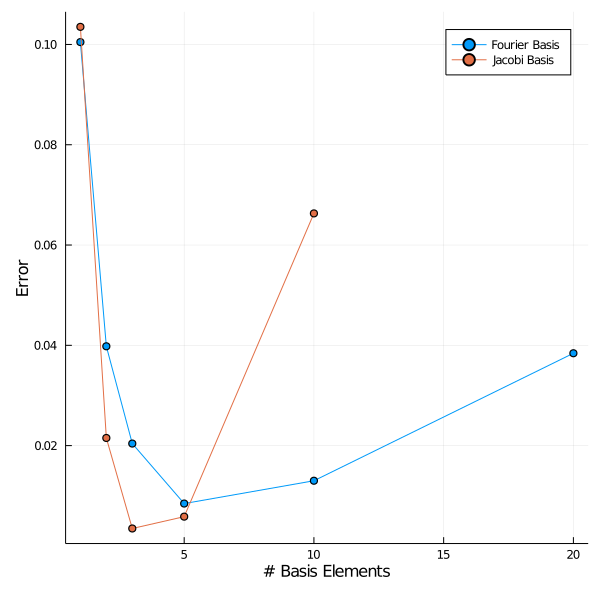

In [9]:
savepath="/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"

p = plot(Nrange_fourier, fourier_error, shape=:circle, xlabel="# Basis Elements", ylabel="Error",
    size=(600, 600), label="Fourier Basis")
plot!(Nrange_jacobi, jacobi_error, shape=:circle, label="Jacobi Basis")
savefig(p, savepath * "error-num-basis-funcs.pdf")
p

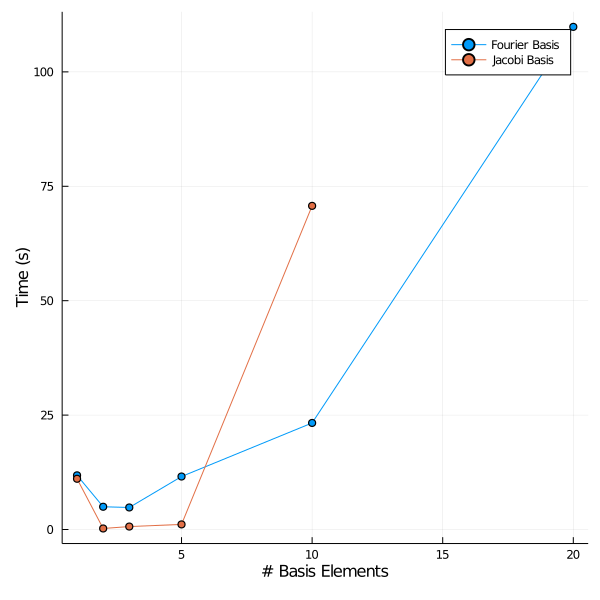

In [14]:
savepath="/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"

p = plot(Nrange_fourier, fourier_time, shape=:circle, xlabel="# Basis Elements", ylabel="Time (s)",
    size=(600, 600), label="Fourier Basis")
plot!(Nrange_jacobi, jacobi_time, shape=:circle, label="Jacobi Basis")
savefig(p, savepath * "time-num-basis-funcs.pdf")
p